# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
# загрузим библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Загрузим датасет в датафрейм `data`.

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 8.1. Выведите перечень уникальных значений столбца `gender`.**

In [10]:
# Находим уникальные значения для столбца 'gender'.
data['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [11]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

**Задание 9.1 В столбце `gender` есть аномальное значение. Удалите строки, в которых встречается такое аномальное значение из датафрейма `data`.**

In [12]:
data = data[(data['gender'] == 'M') | (data['gender'] == 'F')]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [13]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

**Задание 10.1 Ещё раз выведите перечень уникальных значений столбца `gender`, чтобы убедиться, что артефакты удалены.**

In [14]:
data['gender'].unique()

array(['F', 'M'], dtype=object)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [15]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [16]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [17]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [18]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [19]:
data.duplicated().sum()

71

In [20]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [21]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [22]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [23]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [24]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [25]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

**Для выявления зависимости между количеством детей и возвратом кредита в срок нам потребуется доля должников для каждой когорты от общего числа заемщиков в когорте. Когорты в данном случае формируются по количеству детей.**

In [26]:
# Выявим долю должников в каждой когорте, предварительно агрегировав общее количество родителей и должников.
# Поскольку id заемщика не представлен, здесь и далее примем за заемщика его доход.
df_parents = data.groupby(['children']).agg({'total_income':['count'], 'debt':['sum']})
df_parents['debtors_share'] = (df_parents['debt']['sum'] / df_parents['total_income']['count']) * 100


# Сброс мультииндекса столбцов, объединяя уровни индекса
df_parents.columns = ['_'.join(col).strip() for col in df_parents.columns.values]

df_parents = df_parents.reset_index()
df_parents = df_parents.rename(columns={'children':'children_number', 'total_income_count':'parents', 'debt_sum':'debtors', 'debtors_share_':'debtors_share'})
df_parents

,children_number,parents,debtors,debtors_share
0,0,14090,1063,7.544358
1,1,4808,444,9.234609
2,2,2052,194,9.454191
3,3,330,27,8.181818
4,4,41,4,9.756098
5,5,9,0,0.000000


Text(0.5, 0, 'Количество детей')

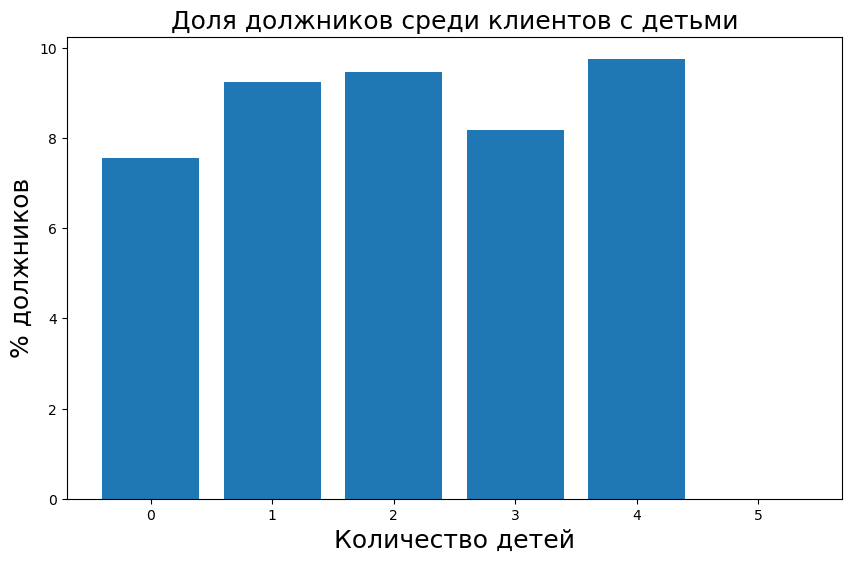

In [27]:
# Создадим визуализацию выявленной статистики.
plt.figure(figsize=(10, 6))
plt.bar(df_parents['children_number'], df_parents['debtors_share'])

plt.title('Доля должников среди клиентов с детьми', fontsize=18)
plt.ylabel('% должников', fontsize=18)
plt.xlabel('Количество детей', fontsize=18)

Как можно наблюдать из таблицы выше, наблюдается слабая зависимость наличия детей на возврат кредита в срок. Влияние количества детей на возврат кредитных обязательств не наблюдается. Так, мы наблюдаем небольшой скачок в доли должников без детей и с детьми. Среди должников с детьми их доля от общего числа в когорте практически не изменяется, либо изменяется в пределах 1-1,5%. Изменения в доли должников варьируются в пределах 2%, однако изменение доли когорты без детей и с 1 ребенком подкрепляется большей выборкой, пока изменения в когортах с разным количеством детей имеет малую выборку для учета в кредитном скоринге.
Рассмотрим дополнительные критерии. Учитывая специфику института семьи, следует принять во внимание и пол заемщиков. Выведем общее число заемщиков и должников для обоих полов с выявлением доли последних от общего числа.

In [28]:
# Выявим долю должников для обоих полов, предварительно агрегировав общее количество заемщиков и должников. 
df_gender = data.groupby(['gender']).agg({'total_income':['count'], 'debt':['sum']})
df_gender['debtors_share'] = (df_gender['debt']['sum'] / df_gender['total_income']['count']) * 100
df_gender.columns = ['_'.join(col).strip() for col in df_gender.columns.values]
df_gender = df_gender.reset_index()
df_gender = df_gender.rename(columns={'total_income_count':'clients', 'debt_sum':'debtors', 'debtors_share_':'debtors_share'})
df_gender

,gender,clients,debtors,debtors_share
0,F,14092,989,7.018166
1,M,7238,743,10.265267


Text(0.5, 0, 'Пол')

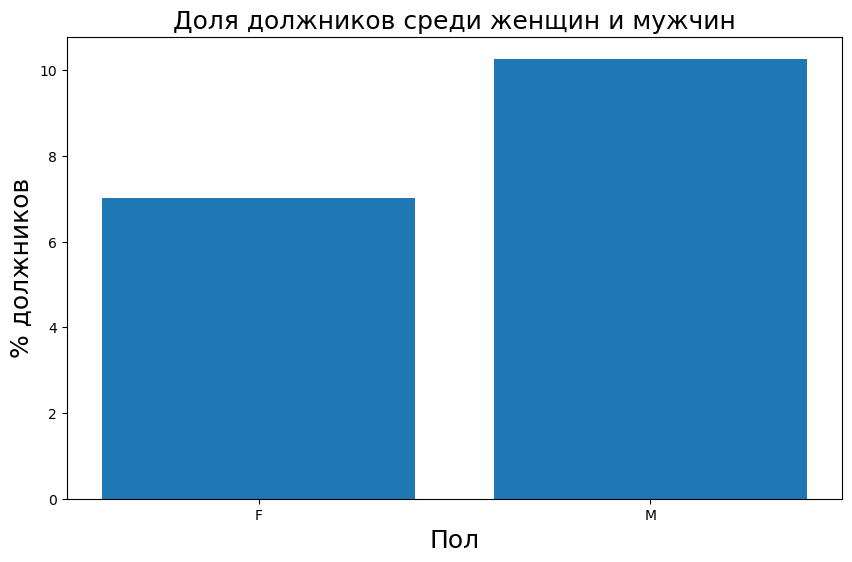

In [29]:
# Создадим визуализацию выявленной статистики.
plt.figure(figsize=(10, 6))
plt.bar(df_gender['gender'], df_gender['debtors_share'])

plt.title('Доля должников среди женщин и мужчин', fontsize=18)
plt.ylabel('% должников', fontsize=18)
plt.xlabel('Пол', fontsize=18)

Доля должников среди мужчин выше, чем тот же показатель у женщин, хотя случаев кредитования у женщин почти в 2 раза больше. Если процент должников у мужчин вполне объясняется реалиями социальных норм, то высокая доля кредитования у женщин вызывает вопросы о причинах такой диспропорции. Объяснение тому может лежать в гражданском состоянии заемщиков.
Обощим промежуточные результаты.

In [30]:
# Выведем общую долю должников по количеству детей и половой принадлежности.
df_gender_parents1 = data.groupby(['children', 'gender']).agg({'total_income':['count'], 'debt':['sum']})
df_gender_parents1['debtors_share'] = (df_gender_parents1['debt']['sum'] / df_gender_parents1['total_income']['count']) * 100

df_gender_parents1

total_income debt debtors_share
                       count  sum              
children gender                                
0        F              9520  592      6.218487
         M              4570  471     10.306346
1        F              3085  245      7.941653
         M              1723  199     11.549623
2        F              1256  134     10.668790
         M               796   60      7.537688
3        F               196   17      8.673469
         M               134   10      7.462687
4        F                28    1      3.571429
         M                13    3     23.076923
5        F                 7    0      0.000000
         M                 2    0      0.000000

In [31]:
# Выведем общую долю должников по количеству детей и половой принадлежности.
df_gender_parents = data.groupby(['children', 'gender'], as_index=False).agg({'total_income':['count'], 'debt':['sum']})
df_gender_parents['debtors_share'] = (df_gender_parents['debt']['sum'] / df_gender_parents['total_income']['count']) * 100
df_gender_parents.columns = ['_'.join(col).strip() for col in df_gender_parents.columns.values]
df_gender_parents = df_gender_parents.rename(columns={
    'children_':'children',
    'gender_':'gender',
    'total_income_count':'clients',
    'debt_sum':'debtors',
    'debtors_share_':'debtors_share'})
df_gender_parents

,children,gender,clients,debtors,debtors_share
0,0,F,9520,592,6.218487
1,0,M,4570,471,10.306346
2,1,F,3085,245,7.941653
3,1,M,1723,199,11.549623
4,2,F,1256,134,10.668790
5,2,M,796,60,7.537688
6,3,F,196,17,8.673469
7,3,M,134,10,7.462687
8,4,F,28,1,3.571429
9,4,M,13,3,23.076923


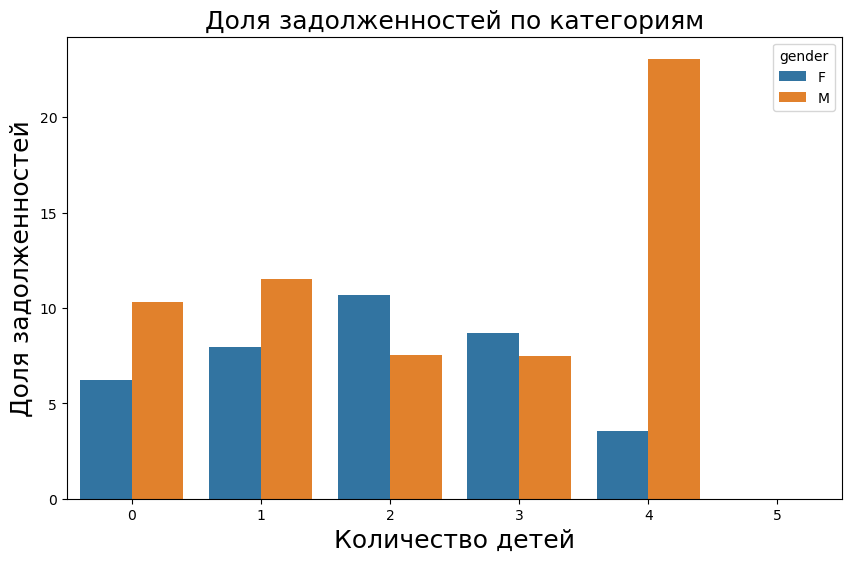

In [32]:
# Создадим визуализацию выявленной статистики.
data_gender_parents = df_gender_parents.pivot_table(index=['children','gender'], values='debtors_share')

data_gender_parents = data_gender_parents.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='children', y='debtors_share', hue='gender', data=data_gender_parents)
plt.xlabel('Количество детей', fontsize=18)
plt.ylabel('Доля задолженностей', fontsize=18)
plt.title('Доля задолженностей по категориям', fontsize=18)
plt.show()

**Вывод:
Наблюдается слабая зависимость наличия детей на возврат кредита в срок. Влияние количества детей на возврат кредитных обязательств не наблюдается. У мужчин больше вероятность просрочки займа по сравнению с женщинами, что справедливо безотносительно наличия детей. При учете  половой принадлежности и количества детей можно наблюдать меньший процент просрочек у женщин без детей и с детьми, пока у мужчин этот показатель стандартно выше, а при наличии нескольких детей возврат долга многодетными отцами соразмерен предыдущим когортам.** 

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

**Для выявления зависимости между семейным положением и возвратом кредита в срок нам потребуется доля должников для каждой когорты от общего числа заемщиков в когорте. Когорты в данном случае формируются по категориальным значениям.**

In [33]:
# Выявим долю должников в каждой когорте, предварительно агрегировав общее количество родителей и должников.
# Поскольку id заемщика не представлен, здесь и далее примем за заемщика его доход.
df_age = data.groupby(['family_status']).agg({'total_income':['count'], 'debt':['sum']})
df_age['debtors_share'] = (df_age['debt']['sum'] / df_age['total_income']['count']) * 100


# Сброс мультииндекса столбцов, объединяя уровни индекса
df_age.columns = ['_'.join(col).strip() for col in df_age.columns.values]

df_age = df_age.reset_index()
df_age = df_age.rename(columns={'family_status':'family_status', 'total_income_count':'statuses', 'debt_sum':'debtors', 'debtors_share_':'debtors_share'})
df_age


,family_status,statuses,debtors,debtors_share
0,Не женат / не замужем,2796,273,9.763948
1,в разводе,1189,84,7.064760
2,вдовец / вдова,951,63,6.624606
3,гражданский брак,4133,385,9.315267
4,женат / замужем,12261,927,7.560558


Text(0.5, 0, 'Гражданское состояние')

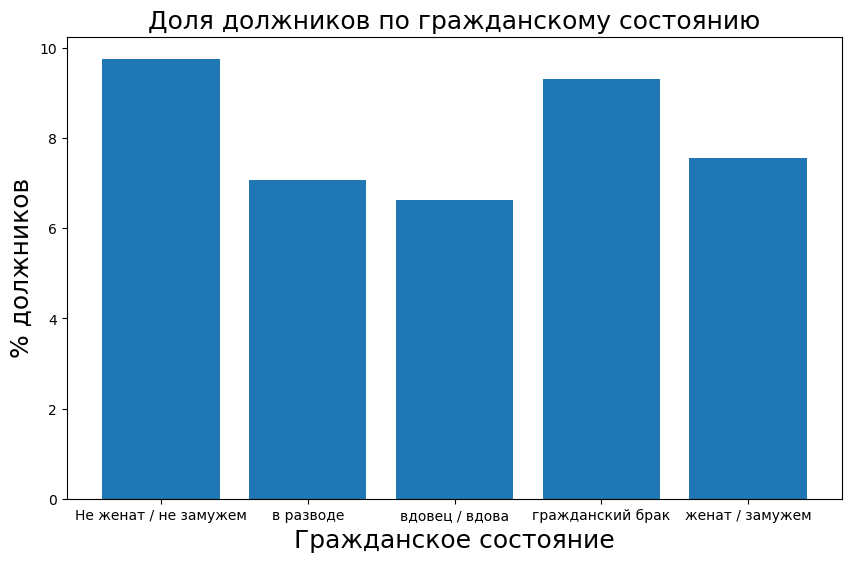

In [34]:
# Создадим визуализацию выявленной статистики.
plt.figure(figsize=(10, 6))
plt.bar(df_age['family_status'], df_age['debtors_share'])

plt.title('Доля должников по гражданскому состоянию', fontsize=18)
plt.ylabel('% должников', fontsize=18)
plt.xlabel('Гражданское состояние', fontsize=18)

Среди клиентов, разделенных по гражданскому состоянию, наиболее высокий процент должников среди тех, кто не состоит в официально оформленном браке, в то время как клиенты, состоящие в действующем или недействующем официальном браке, показывают меньший процент задолженности.

Рассмотрим выявленную статистику с учетом пола клиентов.

In [35]:
# Выявим процент должников в соответствии с полом и гражданским статусом клиентов.
df_age_status = data.groupby(['gender', 'family_status'], as_index=False).agg({'total_income':['count'], 'debt':['sum']})
df_age_status['debtors_share'] = (df_age_status['debt']['sum'] / df_age_status['total_income']['count']) * 100

# Сброс мультииндекса столбцов, объединяя уровни индекса
df_age_status.columns = ['_'.join(col).strip() for col in df_age_status.columns.values]
df_age_status = df_age_status.rename(columns={'gender_':'gender', 'family_status_':'family_status', 'total_income_count':'clients', 'debt_sum':'debtors', 'debtors_share_':'debtors_share'})

df_age_status

,gender,family_status,clients,debtors,debtors_share
0,F,Не женат / не замужем,1723,118,6.848520
1,F,в разводе,931,61,6.552095
2,F,вдовец / вдова,896,52,5.803571
3,F,гражданский брак,2832,232,8.192090
4,F,женат / замужем,7710,526,6.822309
5,M,Не женат / не замужем,1073,155,14.445480
6,M,в разводе,258,23,8.914729
7,M,вдовец / вдова,55,11,20.000000
8,M,гражданский брак,1301,153,11.760184
9,M,женат / замужем,4551,401,8.811250


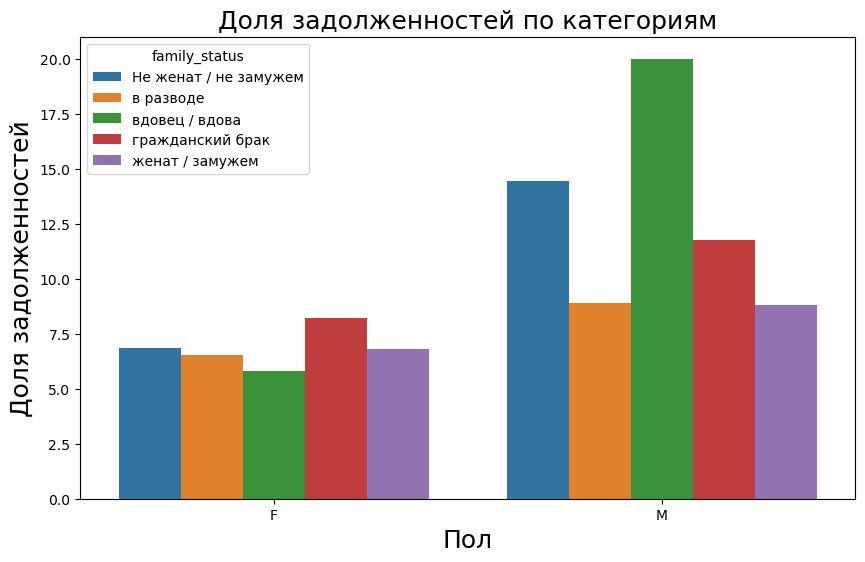

In [36]:
# Создадим визуализацию выявленной статистики. 
data_pivot = df_age_status.pivot_table(index=['gender','family_status'], values='debtors_share')

data_pivot_df = data_pivot.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='debtors_share', hue='family_status', data=data_pivot_df)
plt.xlabel('Пол', fontsize=18)
plt.ylabel('Доля задолженностей', fontsize=18)
plt.title('Доля задолженностей по категориям', fontsize=18)
plt.show()

**Вывод:
Сильной зависимости между семейным положением и возвратом кредита в срок в генеральной совокупности не наблюдается, но в сегменте выборки мужчин можно наблюдать более высокий процент должников среди холостых и вдовцов (хотя последняя категория и имеет слабую выборку). Также стоит отметить тенденцию к кластеризации по стабильности статуса: официально зарегистрированные гражданские состояния имеют меньший процент должников по сравнению с неофициальными. Исходя из представленных выше данных при кредитном скоринге следует учитывать наличие официально зарегистрированного брака в качестве положительного критерия (в особенности среди женского населения). Гражданский брак учитывать сложнее, поэтому в качестве критерия для скоринга добавлять его не следует.** 

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

**Для выявления зависимости между уровнем дохода и возвратом кредита в срок нам потребуется доля должников для каждой когорты от общего числа заемщиков в когорте. Когорты в данном случае формируются по категориям, представляющим диапазоны дохода.**

In [37]:
# Выявим долю должников в каждой категории.
# Поскольку id заемщика не представлен, здесь и далее примем за заемщика его доход.
df_income = data.groupby(['total_income_category']).agg({'total_income':['count'], 'debt':['sum']})
df_income['debtors_share'] = (df_income['debt']['sum'] / df_income['total_income']['count']) * 100


# Сброс мультииндекса столбцов, объединяя уровни индекса
df_income.columns = ['_'.join(col).strip() for col in df_income.columns.values]

df_income = df_income.rename(columns={'total_income_count':'clients', 'debt_sum':'debtors', 'debtors_share_':'debtors_share'})
df_income

,clients,debtors,debtors_share
total_income_category,,,
A,25,2,8.000000
B,5013,354,7.061640
C,15921,1353,8.498210
D,349,21,6.017192
E,22,2,9.090909


Text(0.5, 0, 'Категория дохода')

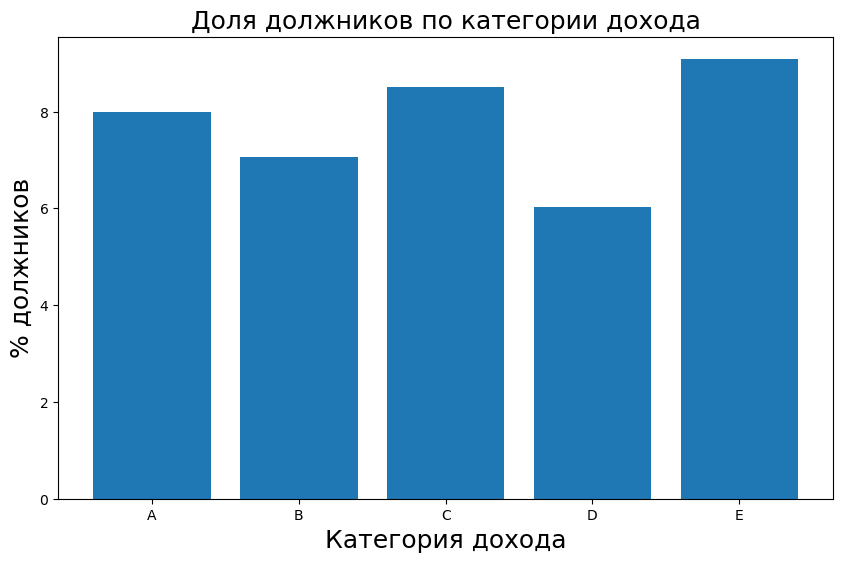

In [38]:
# Создадим визуализацию выявленной статистики.
plt.figure(figsize=(10, 6))
plt.bar(df_income.index, df_income['debtors_share'])

plt.title('Доля должников по категории дохода', fontsize=18)
plt.ylabel('% должников', fontsize=18)
plt.xlabel('Категория дохода', fontsize=18)

Сильной зависимости возврата кредита в срок от уровня дохода не наблюдается. Наиболее распространенная когорта "C" имеет наибольшую выборку, но вместе с тем и одну из самых высоких долей задолженности. Добавим категорию пола для возможного вяывления выдающихся значений.

In [39]:
# Выявим долю должников в каждой категории с учетом возраста.
df_income_gender = data.groupby(['gender', 'total_income_category']).agg({'total_income':['count'], 'debt':['sum']})
df_income_gender['debtors_share'] = (df_income_gender['debt']['sum'] / df_income_gender['total_income']['count']) * 100


# Сброс мультииндекса столбцов, объединяя уровни индекса
df_income_gender.columns = ['_'.join(col).strip() for col in df_income_gender.columns.values]

df_income_gender = df_income_gender.rename(columns={'total_income_count':'clients', 'debt_sum':'debtors', 'debtors_share_':'debtors_share'})
df_income_gender

clients  debtors  debtors_share
gender total_income_category                                 
F      A                           10        0       0.000000
       B                         2695      162       6.011132
       C                        11063      810       7.321703
       D                          308       15       4.870130
       E                           16        2      12.500000
M      A                           15        2      13.333333
       B                         2318      192       8.283003
       C                         4858      543      11.177439
       D                           41        6      14.634146
       E                            6        0       0.000000

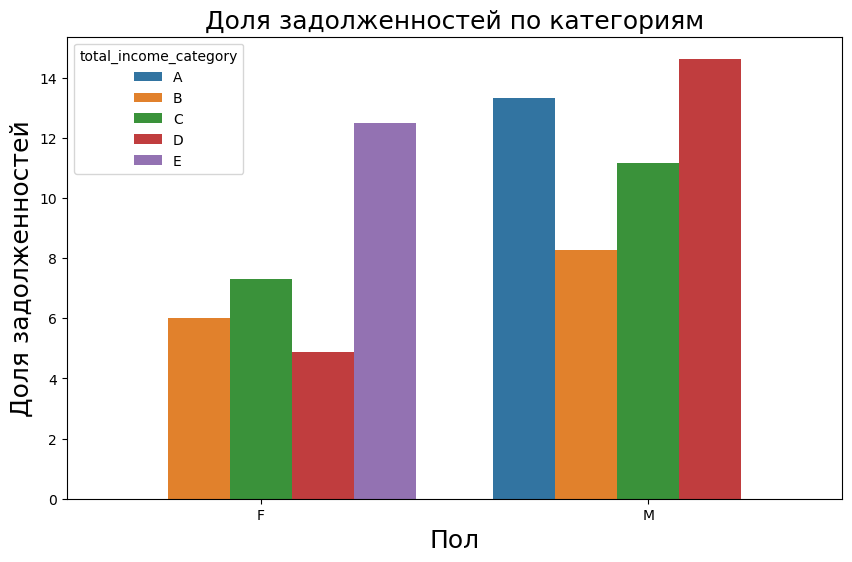

In [40]:
# Создадим визуализацию выявленной статистики. 
df_income_gender = df_income_gender.reset_index()

data_pivot_income_gender = df_income_gender.pivot_table(index=['gender','total_income_category'], values='debtors_share')

data_pivot_income_gender = data_pivot_income_gender.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='debtors_share', hue='total_income_category', data=data_pivot_income_gender)
plt.xlabel('Пол', fontsize=18)
plt.ylabel('Доля задолженностей', fontsize=18)
plt.title('Доля задолженностей по категориям', fontsize=18)
plt.show()

**Вывод:
Как и наблюдалось выше, сильной зависимости возврата кредита в срок от уровня дохода не наблюдается, однако мужчины стабильно имеют более высокий процент залдоженности, нежели женщины, что наблюдается  по все срезам категорий дохода. Наиболее распространенная когорта "C" имеет наибольшую выборку, но вместе с тем и одну из самых высоких долей задолженности, в то время как когорта "B" имеет показатель задолженности меньше большинства остальных. Когорты "A", "D" и "E" имеют достаточно малую выборку, поэтому учитывать показатель задолженности не стоит. Для кредитного скоринга следует добавить положительный критерий в случае принадлежности заемщика к когорты "B". В случае когорты "C" доля слабо отличается от прочих показателей задолженности, поэтому влияние на скоринг в когорте "C" учитывать не стоит.** 

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

**Для выявления зависимости между целями кредитования и возвратом его в срок нам потребуется доля должников для каждой когорты от общего числа заемщиков в когорте. Когорты в данном случае формируются по категориям.**

In [41]:
# Выявим долю должников в каждой категории цели кредитования.
# Поскольку id заемщика не представлен, здесь и далее примем за заемщика его доход.
df_borrowers = data.groupby(['purpose_category']).agg({'total_income':['count'], 'debt':['sum']})
df_borrowers['debtors_share'] = (df_borrowers['debt']['sum'] / df_borrowers['total_income']['count']) * 100


# Сброс мультииндекса столбцов, объединяя уровни индекса
df_borrowers.columns = ['_'.join(col).strip() for col in df_borrowers.columns.values]

df_borrowers = df_borrowers.rename(columns={'total_income_count':'clients', 'debt_sum':'debtors', 'debtors_share_':'debtors_share'})
df_borrowers

,clients,debtors,debtors_share
purpose_category,,,
операции с автомобилем,4279,400,9.347978
операции с недвижимостью,10750,780,7.255814
получение образования,3988,369,9.252758
проведение свадьбы,2313,183,7.911803


([0, 1, 2, 3],
 [Text(0, 0, 'операции с автомобилем'),
  Text(1, 0, 'операции с недвижимостью'),
  Text(2, 0, 'получение образования'),
  Text(3, 0, 'проведение свадьбы')])

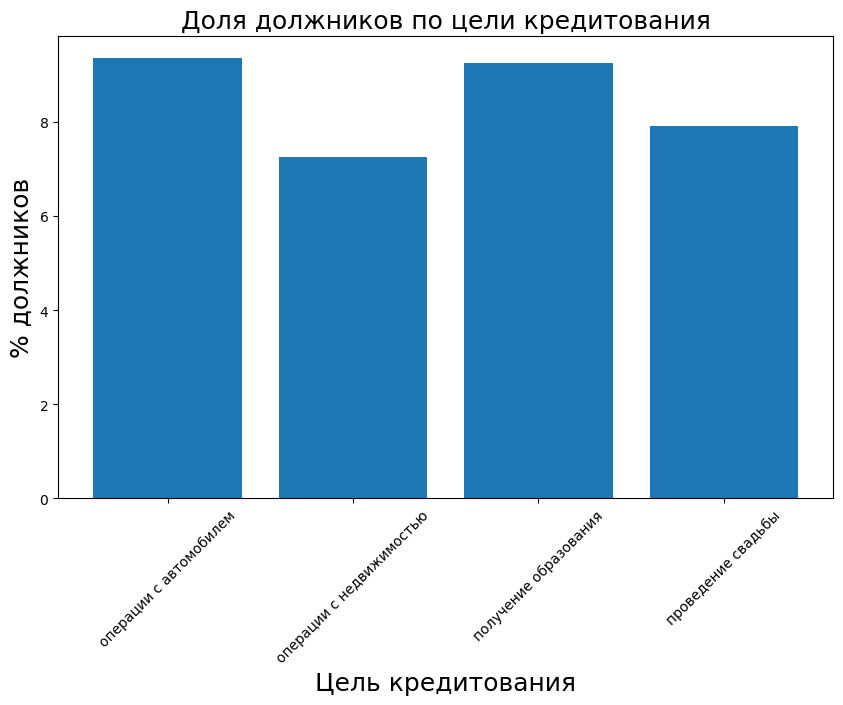

In [42]:
# Создадим визуализацию выявленной статистики.
plt.figure(figsize=(10, 6))
plt.bar(df_borrowers.index, df_borrowers['debtors_share'])

plt.title('Доля должников по цели кредитования', fontsize=18)
plt.ylabel('% должников', fontsize=18)
plt.xlabel('Цель кредитования', fontsize=18)
plt.xticks(rotation=45)

**Вывод:
Наблюдается зависимость выплаты кредитных обязательств от цели кредита. Так, когорты "операции с недвижимостью" и "проведение свадьбы" показывают низкую долю задолженности заемщиков по сравнению с когортами "операции с автомобилем" и "получение образования". Стоит учитывать и выборку категорий: если операции с недвижимостью занимают почти половину от генеральной совокупности, то остальные категории представлены достаточно слабо для однозначных выводов. Для кредитного скоринга стоит учитывать в качестве положительного критерия займ с целью "операции с недвижимостью", а остальные цели оценивать с учетом прочих данных.** 

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:
для определения возможных причин появления пропусков рассмотрим их основные случаи.*

In [43]:
# Рассмотрим ещё раз необработанный датасет на предмет пропусков.
raw_data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [44]:
# Рассмотрим ещё раз необработанный датасет на предмет пропусков.
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


*Как можно наблюдать из таблицы выше, пропуски фиксируются в столбцах с данными о трудовом стаже и уровне дохода. И тот, и другой столбец предоставляет критически важные данные для основных критериев по кредитованию. Как сам доход, так и его обеспечнность трудовым стажем выступает основным гарантом возврата займа.
Также возможны технические причины наличия пропусков, однако равномерное распределение пропусков по двум столбцам указывает на человеческий фактор и заинтересованность в сокрытии данных.*

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ: В отличии от категориальных переменных, которые имеют ограниченный набор значений, количественные переменные имеют широкий диапазон возможных числовых значений. Данное свойство количественных переменных приводит к неравномерному распределению значений, которые ослажняют адекватную оценку статистических показателей, а следоватиельно - и выводов на их основе. Нахождение среднего арифметического для количественных переменных возможно, однако при условии однородности значений. Подсчет медианы для таких данных является наиболее предпочтительным способом заполнения пропусков, т.к. предоставляет наиболее типичное или усредненное значение в пределах всей совокупности. Таким образом, если мы заполняем пропуски средним арифметическим значением, то рискуем исказить данные из-за нетипично высоких или низких значений, а медиана в таком случае позволяет выбрать наиболее типичное значение, не искажающее имеющиеся данные.* 

### Шаг 4: общий вывод.

#### Обзор данных
Данный датасет предоставляет данные по клиентам и их кредитной истории. В датасет включена основная информация о клиентах, включая:
+ наличие и/или количество детей,
+ трудовой стаж,
+ возраст,
+ образование,
+ гражданское состояние,
+ пол,
+ источник дохода,
+ совокупный доход,
+ цель предыдущего кредитования.

Общий размер датасета перед предобработки данных - 21525 вхождений, после - 21330 вхождений. Данный объем представляется недостаточным для однозначных выводов, однако в пределах такого объема данных выделяется ряд трендов, которые будут полезны для кредитного скоринга будущих заемщиков. Дальнейшие выводы требуют дополнительного подтверждения на болшей выборке.

#### Методология

##### Предобработка данных
Полученные данные имели ряд типичных для сырых данных свойств, без устранения которых было бы невозможно получить достоверные результаты. Среди них: пропуски, некорректные типы данных, аномальные значения, дубликаты. Недостоверные значения (пропуски, дубликаты, аномалии) были удалены или приведены к средним значениям, а типы данных приведены к удобному для дальнейшего манипулирвоания формату. Также крупные разбросы в ключевых для анализа значениях были категоризированы (уровень дохода и цель кредитования).

##### Анализ данных на предмет наличия зависимостей по ключевым параметрам
На данном этапе производилась группировка данных по ключевым параметрам (наличие детей, гражданское состояние, уровень дохода и цель кредитования). Данные параметры сопоставлялись с процентом заемщиков, имеющих задолженность, с целью выявления зависимости возрата займа в срок от выбранных параметров. Для этого из датасета выявлены целевые срезы, а также составлены сводные таблицы, сгруппированные по ключевым параметрам. На основе данных таблиц строится визуализация для наглядного выявления зависимости и ее силы. В некоторых случаях, когда проявлялась слабовыраженная зависимость, проводилось сопоставление целевого паракметра с дополнительным на предмет усиления или ослабления зависимости. По результатам выявленных показателей строятся выводы по ключевым параметрам и зависимостью своевременного возрата займа от них.

#### Выводы по клбчевым параметрам
##### Количество детей заемщиков
По факту сопоставления уровня задолженности у клиентов, разделенных по количеству детей, наблюдается слабая зависимость возврата займа. Больший  контраст выявлен по соспоставлению заемщиков с детьми и без детей: если разница в проценте должников с детьми варьируется в пределах 1-1,5%, то должников без детей на 2 % меньше от среднего показателея должников с детьми.
В качестве дополнительного критерия включена и половая принадлежность. И в отдельном распределении по полу, и в совокупном с критерием наличия детей должниками стабильно выступают мужчины. Данный тренд нарушается только при 3 и более детей, однако в данном срезе выборка недостаточна для утверждения по всем категориям родителей.

##### Семейное положение
Сопоставление заемщиков по семейному положению и их проценту задолженности от общего числа демонстрирует повышенный процент должников среди тех, кто не состоит в официально оформленном браке, в то время как клиенты, состоящие в действующем или недействующем официальном браке, показывают меньший процент задолженности. В этом отношении любопытно распределение должников по половой принадлежности: женщины вне зависимости от гражданского состояния показывают стабильный процент задолженности в пределах 6-8%, пока мужчины усиливают выявленный ранее тренд, показывая наименьший процент задолженности именно у тех, кто состоит или состоял в браке.

##### Уровень дохода
При сопоставлении уровня дохода заемщиков и процента их должников категория дохода "C" (50000-200000 р.) имеет одну из самых высоких долей задолженности (хотя и имеет наибольшую выборку), в то время как когорта "B" (200000-1000000) имеет показатель задолженности меньше большинства остальных. Когорты "A" (1000000 и выше), "D" (30000-50000) и "E"(до 30000) имеют достаточно малую выборку для достоверного вывода. При добавлении категории пола женщины демонстрируют относительно низкий процент задолженности (4-7%), в то время как мужчины, наоборот, превышают 10% во всех категориях, кроме категории "B". Наиболее показательна для анализа категория "B", так как вне зависимости от пола она демонстрирует относительно высокий доход при низком проценте задолженности, что следует рассматривать как положительный признак для потенциального заемщика.

##### Цель кредитования
Выявления зависимости возврата кредита в срок от цели кредитования демонстрирует следующие результаты: категории "операции с недвижимостью" и "проведение свадьбы" показывают низкую долю задолженности заемщиков по сравнению с категориями "операции с автомобилем" и "получение образования". Однако категория "проведение свадьбы" показывает слабую выборку, поэтому положительным критерием выступает ипотека, в то время как кредитование под дополнительные затраты (автомобиль и образование) показывает более высокий процент риска.

#### Вывод
На основе проведенного анализа и его результатов можно выделить основные криетрии для положительной или отрицательной оценки риска потенциального заемщика.

Так, среди целевых критериев для выявления зависимости возврата кредита в срок наиболее надежными (низкими по задолженности) выступают:
+ отсутствие детей,
+ официально оформленный брак (вне зависимости от актуального статуса),
+ доход от 50000 до 200000 р.,
+ ипотека.

Среди характеристик, увеличивающих риск просрочки выплат по кредиту, выделяются:
+ родитель (более 2-х детей),
+ не состоит в официально зарегистрированном браке,
+ доход ниже 50000 и выше 200000 р.,
+ кредит на автомобиль или образование.

Отдельно стоит отметить распределение должников по половой принадлежности. Хотя должников среди мужчин значительно больше, чем у женщин, данная закономерность требует дополнительного анализа на большей выборке, поскольку не учитываются дополнительные критерии, такие как социальные нормы, источники дохода и другие. По данной причине половую принадлежность стоит учитывать в качестве дополнительного, но не основного критерия оценки риска.